# Databases 2

In order to look at multi-table join queries, we are going to again create a simple, toy SQLite database.

In [ ]:
!pip install mechanize

     |████████████████████████████████| 112kB 2.8MB/s 


In [ ]:
import sqlalchemy

The database will be stored in the file `boat_rental.db` in the local directory.

In [ ]:
# Delete the database if it already exists.
from pathlib import Path
dbfile = Path("boat_rental.db")
if dbfile.exists():
    dbfile.unlink()

sqlite_uri = "sqlite:///boat_rental.db"
sqlite_engine = sqlalchemy.create_engine(sqlite_uri)

Our boat rental buisness needs to store data in 3 tables, one holds information about the renters (sailors), a seconds holds information about the boats and the third gives details of rental transactions.

In [ ]:
sql_expr = """
CREATE TABLE sailors(
    sid INTEGER PRIMARY KEY, -- Sailor ID Number
    sname TEXT, -- Sailor Name
    rating INTEGER, -- Sailor skill rating
    age INTEGER); 

"""
result = sqlite_engine.execute(sql_expr)

In [ ]:
sql_expr = """
CREATE TABLE boats(
    bid INTEGER PRIMARY KEY, -- Boat ID Number
    bname TEXT, -- Boat Name
    bcolor TEXT);
"""
result = sqlite_engine.execute(sql_expr)

In [ ]:
sql_expr = """
CREATE TABLE reserves(
    sid INTEGER,
    bid INTEGER,
    day DATE,
    PRIMARY KEY(sid, bid, day),
    FOREIGN KEY (sid) REFERENCES sailors,
    FOREIGN KEY (bid) REFERENCES boats);
"""
result = sqlite_engine.execute(sql_expr)

Let's double-check the schema of our tables to make sure they are correct.

In [ ]:
inspector = sqlalchemy.inspect(sqlite_engine)
inspector.get_table_names()

['boats', 'reserves', 'sailors']

In [ ]:
# Get column information
print('sailors = ')
for col in inspector.get_columns("sailors"):
    print(col)

print('boats = ')
for col in inspector.get_columns("boats"):
    print(col)
    
print('reserves = ')
for col in inspector.get_columns("reserves"):
    print(col)

sailors = 
{'name': 'sid', 'type': INTEGER(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'sname', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'rating', 'type': INTEGER(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'age', 'type': INTEGER(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
boats = 
{'name': 'bid', 'type': INTEGER(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'bname', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'bcolor', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
reserves = 
{'name': 'sid', 'type': INTEGER(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'bid', 'type': INTEGER(), 'nullable': True, 'default':

Now let's populate our tables with data.

In [ ]:
sql_expr = """
INSERT INTO sailors VALUES 
  (1, 'Susan', 7, 24),
  (2, 'Jim', 2, 35),
  (3, 'Nancy', 8, 41),
  (4, 'Dustin', 7, 35),
  (5, 'Lubber', 8, 50),
  (6, 'Rusty', 10, 69);
  
"""
result = sqlite_engine.execute(sql_expr)

In [ ]:
sql_expr = """
INSERT INTO boats VALUES
  (101, 'Nina', 'red'),
  (102, 'Pinta', 'blue'),
  (103, 'Santa Maria', 'red');
"""
result = sqlite_engine.execute(sql_expr)

In [ ]:
sql_expr = """
INSERT INTO reserves VALUES
  (5, 102, '7/1/18'),
  (1, 103, '7/1/18'),
  (6, 101, '7/4/18'),
  (3, 102, '7/5/18');
"""
result = sqlite_engine.execute(sql_expr)

And display the information in our tables.

In [ ]:
import pandas as pd

sql_expr = """
SELECT * FROM sailors;
"""
pd.read_sql(sql_expr, sqlite_engine)

,sid,sname,rating,age
0,1,Susan,7,24
1,2,Jim,2,35
2,3,Nancy,8,41
3,4,Dustin,7,35
4,5,Lubber,8,50
5,6,Rusty,10,69


In [ ]:
sql_expr = """
SELECT * FROM boats;
"""
pd.read_sql(sql_expr, sqlite_engine)

,bid,bname,bcolor
0,101,Nina,red
1,102,Pinta,blue
2,103,Santa Maria,red


In [ ]:
sql_expr = """
SELECT * FROM reserves;
"""
pd.read_sql(sql_expr, sqlite_engine)

,sid,bid,day
0,5,102,7/1/18
1,1,103,7/1/18
2,6,101,7/4/18
3,3,102,7/5/18


### Make a simple, single table query
It may be helpful to look back at the previous Lab Notebook.

In [ ]:
# TASK 1: Perform a query of the sailors table to 
# display the names of the sailors who are of age 50
# or older and are, therefore, eligible for your company's 
# senior discount.
sql_expr = """
SELECT sname
FROM sailors
WHERE age >= 50;
"""
pd.read_sql(sql_expr, sqlite_engine)

,sname
0,Lubber
1,Rusty


## Joins
If we want to look at information across tables, it is necessary to join them.

First let's look at the the result of performing the join.

In [ ]:
sql_expr = """
SELECT * -- all columns
FROM reserves, sailors;
"""
pd.read_sql(sql_expr, sqlite_engine)

,sid,bid,day,sid,sname,rating,age
0,5,102,7/1/18,1,Susan,7,24
1,5,102,7/1/18,2,Jim,2,35
2,5,102,7/1/18,3,Nancy,8,41
3,5,102,7/1/18,4,Dustin,7,35
4,5,102,7/1/18,5,Lubber,8,50
5,5,102,7/1/18,6,Rusty,10,69
6,1,103,7/1/18,1,Susan,7,24
7,1,103,7/1/18,2,Jim,2,35
8,1,103,7/1/18,3,Nancy,8,41
9,1,103,7/1/18,4,Dustin,7,35


The rows of the join are made up of all possible combinations of the rows of reserves and sailors.  We can get the same results by explicitly using the `JOIN` argument.

In [ ]:
sql_expr = """
SELECT * -- all columns
FROM reserves JOIN sailors;
"""
pd.read_sql(sql_expr, sqlite_engine)

,sid,bid,day,sid,sname,rating,age
0,5,102,7/1/18,1,Susan,7,24
1,5,102,7/1/18,2,Jim,2,35
2,5,102,7/1/18,3,Nancy,8,41
3,5,102,7/1/18,4,Dustin,7,35
4,5,102,7/1/18,5,Lubber,8,50
5,5,102,7/1/18,6,Rusty,10,69
6,1,103,7/1/18,1,Susan,7,24
7,1,103,7/1/18,2,Jim,2,35
8,1,103,7/1/18,3,Nancy,8,41
9,1,103,7/1/18,4,Dustin,7,35


### Natural/Inner Join
We will often want to join tables on an attribute that is shared accross tables.  For example, it makes sense to perform a join on sid for the reserves and sailors tables so that we are seeing reservation information for each sailor.  A natural or inner join only displays join rows where the join key (sid) is shared.  The following queries are all equivalent.

In [ ]:
sql_expr = """
SELECT *
FROM reserves AS r, sailors AS s
WHERE r.sid = s.sid
"""
pd.read_sql(sql_expr, sqlite_engine)

,sid,bid,day,sid,sname,rating,age
0,5,102,7/1/18,5,Lubber,8,50
1,1,103,7/1/18,1,Susan,7,24
2,6,101,7/4/18,6,Rusty,10,69
3,3,102,7/5/18,3,Nancy,8,41


In [ ]:
sql_expr = """
SELECT *
FROM reserves AS r JOIN sailors AS s
ON r.sid = s.sid
"""
pd.read_sql(sql_expr, sqlite_engine)

,sid,bid,day,sid,sname,rating,age
0,5,102,7/1/18,5,Lubber,8,50
1,1,103,7/1/18,1,Susan,7,24
2,6,101,7/4/18,6,Rusty,10,69
3,3,102,7/5/18,3,Nancy,8,41


In [ ]:
sql_expr = """
SELECT *
FROM reserves r INNER JOIN sailors s -- The AS arguments are always optional
ON r.sid = s.sid
"""
pd.read_sql(sql_expr, sqlite_engine)

,sid,bid,day,sid,sname,rating,age
0,5,102,7/1/18,5,Lubber,8,50
1,1,103,7/1/18,1,Susan,7,24
2,6,101,7/4/18,6,Rusty,10,69
3,3,102,7/5/18,3,Nancy,8,41


In [ ]:
# NATURAL JOIN, unlike the others, will automatically
# find column names both tables have in common
sql_expr = """
SELECT *
FROM reserves r NATURAL JOIN sailors s 
"""
pd.read_sql(sql_expr, sqlite_engine)

,sid,bid,day,sname,rating,age
0,5,102,7/1/18,Lubber,8,50
1,1,103,7/1/18,Susan,7,24
2,6,101,7/4/18,Rusty,10,69
3,3,102,7/5/18,Nancy,8,41


We can use natural joins to pull out information on the history of specific sailors with our company.

In [ ]:
sql_expr = """
SELECT s.sid, s.sname, r.bid, r.day
FROM reserves r, sailors s
WHERE r.sid = s.sid
AND s.age >= 30
ORDER BY s.sname
"""
pd.read_sql(sql_expr, sqlite_engine)

,sid,sname,bid,day
0,5,Lubber,102,7/1/18
1,3,Nancy,102,7/5/18
2,6,Rusty,101,7/4/18


A report on Rusty's buisness.

In [ ]:
sql_expr = """
SELECT s.sid, s.rating, r.bid, r.day
FROM reserves r JOIN sailors s
ON r.sid = s.sid
WHERE s.sname = 'Rusty'
"""
pd.read_sql(sql_expr, sqlite_engine)

,sid,rating,bid,day
0,6,10,101,7/4/18


We can also form inner joins on all 3 tables since both sailors and boats each share a column with reserves.

In [ ]:
sql_expr = """
SELECT *
FROM reserves r JOIN sailors s
ON r.sid = s.sid
JOIN boats b
ON r.bid = b.bid
"""
pd.read_sql(sql_expr, sqlite_engine)

,sid,bid,day,sid,sname,rating,age,bid,bname,bcolor
0,5,102,7/1/18,5,Lubber,8,50,102,Pinta,blue
1,1,103,7/1/18,1,Susan,7,24,103,Santa Maria,red
2,6,101,7/4/18,6,Rusty,10,69,101,Nina,red
3,3,102,7/5/18,3,Nancy,8,41,102,Pinta,blue


In [ ]:
# TASK 2: Generate a report on the company's boats.
# You should display the boat id number, boat name, boat color,
# and the sailor id, name, and day the sailor rented that boat.

sql_expr = """
SELECT b.bid, b.bname, b.bcolor, s.sid, s.sname, r.day, s.rating
FROM reserves r JOIN sailors s
ON r.sid = s.sid
JOIN boats b
ON r.bid = b.bid
"""
pd.read_sql(sql_expr, sqlite_engine)

,bid,bname,bcolor,sid,sname,day,rating
0,102,Pinta,blue,5,Lubber,7/1/18,8
1,103,Santa Maria,red,1,Susan,7/1/18,7
2,101,Nina,red,6,Rusty,7/4/18,10
3,102,Pinta,blue,3,Nancy,7/5/18,8


### Left/Right Joins

Left joins will include all entries by key in the left table and fill in null values for the right table, where necessary.

In [ ]:
# This returns the same information as an inner join since
# all sid values in the reserves table have a corresponding
# entry in the sailors table

sql_expr = """
SELECT *
FROM reserves r LEFT JOIN sailors s
ON r.sid = s.sid
"""
pd.read_sql(sql_expr, sqlite_engine)

,sid,bid,day,sid,sname,rating,age
0,5,102,7/1/18,5,Lubber,8,50
1,1,103,7/1/18,1,Susan,7,24
2,6,101,7/4/18,6,Rusty,10,69
3,3,102,7/5/18,3,Nancy,8,41


In [ ]:
# But not all sailors have rented a boat

sql_expr = """
SELECT *
FROM sailors s LEFT JOIN reserves r
ON r.sid = s.sid
"""
pd.read_sql(sql_expr, sqlite_engine)

,sid,sname,rating,age,sid,bid,day
0,1,Susan,7,24,1.0,103.0,7/1/18
1,2,Jim,2,35,NaN,NaN,None
2,3,Nancy,8,41,3.0,102.0,7/5/18
3,4,Dustin,7,35,NaN,NaN,None
4,5,Lubber,8,50,5.0,102.0,7/1/18
5,6,Rusty,10,69,6.0,101.0,7/4/18


Right joins work the same way (this time taking all rows from the right table), but SQLite does not support them.  `FULL JOIN` performs an outer join where each row of each table is represented and nulls are filled in, where appropriate.  SQLite does not support outer joins but many other SQL versions do.

## SQL Queries and NULL values

As we see in the example above, left/right/outer joins can result in Null values being inserted into the resulting query result table.  

It is also possible that Null values can result from missing information.

In [ ]:
sql_expr = """
INSERT INTO sailors VALUES
  (7, 'Jack Sparrow', NULL, 35);  -- no skill rating available
"""
result = sqlite_engine.execute(sql_expr)

sql_expr = """
SELECT * 
FROM sailors;
"""
pd.read_sql(sql_expr, sqlite_engine)

,sid,sname,rating,age
0,1,Susan,7.0,24
1,2,Jim,2.0,35
2,3,Nancy,8.0,41
3,4,Dustin,7.0,35
4,5,Lubber,8.0,50
5,6,Rusty,10.0,69
6,7,Jack Sparrow,NaN,35


The following will result in no output because any operator acting on a null value returns a null output.

In [ ]:
sql_expr = """
SELECT *
FROM sailors
WHERE rating = NULL
"""
pd.read_sql(sql_expr, sqlite_engine)

,sid,sname,rating,age


Jack will also never show in a query that references the rating value.

In [ ]:
sql_expr = """
SELECT *
FROM sailors
WHERE rating < 8
"""
pd.read_sql(sql_expr, sqlite_engine)

,sid,sname,rating,age
0,1,Susan,7,24
1,2,Jim,2,35
2,4,Dustin,7,35


You must do an explicit NULL check to find null values.

In [ ]:
sql_expr = """
SELECT *
FROM sailors
WHERE rating IS NULL
"""
pd.read_sql(sql_expr, sqlite_engine)

,sid,sname,rating,age
0,7,Jack Sparrow,None,35


In [ ]:
sql_expr = """
SELECT *
FROM sailors
WHERE rating IS NOT NULL
"""
pd.read_sql(sql_expr, sqlite_engine)

,sid,sname,rating,age
0,1,Susan,7,24
1,2,Jim,2,35
2,3,Nancy,8,41
3,4,Dustin,7,35
4,5,Lubber,8,50
5,6,Rusty,10,69


# Retrieving Information from the SDSS

Enough of these toy databases!

Next, we will query a real database.  This database holds all of the information collected by the Sloan Digital Sky Survey [(SDSS)](https://www.sdss.org/), a massive, collection of astronomical observations covering a third of the sky and millions of astronomical objects, collected by an automated telescope. The instructions for performing the query come from [here](http://balbuceosastropy.blogspot.com/2013/10/an-easy-way-to-make-sql-queries-from.html).

First, we will import the modules we will need.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt


import numpy as np
import pandas as pd
import mechanize
from io import BytesIO 

Next, we need to specify the url where we can submit the SQL queries to the SDSS database. Click on this link to inspect the webpage that we will be using: http://skyserver.sdss.org/dr15/en/tools/search/sql.aspx

In [ ]:
# URL to the SDSS SQL Search Data Release 15
url = "http://skyserver.sdss.org/dr15/en/tools/search/sql.aspx"

### Formulating the Query

We are going to [query the information for stars in the Palomar 5 globular cluster](http://skyserver.sdss.org/dr12/en/proj/advanced/hr/sql.aspx).  A [globular cluster](https://en.wikipedia.org/wiki/Globular_cluster) is a tight swarm of many thousands of stars.  Most galaxies have many globular clusters and Palomar 5 is a globular cluster within our own Milky Way galaxy.

We are going to pull out the information on stars within this cluster.  We will be doing a join between the star and Data Base Objects (dbo) tables to pull out the star objects.  The columns we are reading are as follows:

* objid - each astronomical object's unique ID Number
* ra, dec - the Right Ascension (ra) and Declination (dec) location of each star.  ra/dec is analogous to latitude and longitude on the earth but is fixed to the stars in the sky.
* u, g, r, i, z - the brightness of the star through different [colored filters](http://skyserver.sdss.org/dr2/en/proj/advanced/color/sdssfilters.asp).  They stand for ultraviolet, green, red, infrared and far infrared.  The lower the filter number, the brighter it is in that color.  So if g > r then the star is redder. This seems a bit backwards but it is because brightness is measured in magnitudes which is a system developed by ancient astronomers who called the brightest stars magnitude 1 (because they were the most visible), slightly less bright, magnitude 2 and so on.

There are 3 inputs to the fGetNearbyObjEq function that pulls out a section of the dbo table.  The first two numbers specify the location of the center of the cluster in ra/dec while the 3 means we should pull out every star that has a location within 3 arcminutes of the center (an arcminute is 1/60th of a degree).

In [ ]:
sql_expr = """
SELECT s.objid, s.ra, s.dec, s.u, s.g, s.r, s.i, s.z
FROM star s, dbo.fGetNearbyObjEq(229.0128,-0.1082,3) n
WHERE s.objid = n.objid
"""

### Web surfing with the Python mechanize module
The first step in using `mechanize` will be to create a Browser-like object to be able to navigate using its methods

In [ ]:
br = mechanize.Browser()

Then we must open a session using the url defined above, pointing to the SDSS web page that allows us to make the SQL queries:

In [ ]:
resp = br.open(url)
resp.info()

When you want to interact with a web page, you will be interested to know the HTML forms contained in it. An HTML form is a section of the document between the tags: FORM and /FORM

A HTML form contains a series of special objects called controls such as checkboxes, radio buttons, menus, etc. and labels of these objects. The user interacts with the page by modifying a control, for example by selecting an option, introducing a text in a field, etc. and sending this modified form back to the server.

Each HTML form on the page has a name, although this can in some cases be empty. To get a list of the names of the forms in the page we can write:

In [ ]:
for f in br.forms():
    print(f.name)

sql


That is, in this case there is only one form on the page, named "sql"

At the same time, each form has a list of controls that also have a name, which can also be left blank. To list the forms on the page, along with their controls, and each control type, we can do the following:

In [ ]:
for f in br.forms():
    print(f.name)
    for c in f.controls:
        print('\t',c.name, '\t', c.type)

sql
	 searchtool 	 hidden
	 TaskName 	 hidden
	 syntax 	 hidden
	 ReturnHtml 	 hidden
	 clear 	 button
	 cmd 	 textarea
	 None 	 submit
	 None 	 submit
	 format 	 radio
	 TableName 	 text
	 reset 	 reset


We will focus on the "cmd" control which is the text area in which we write our SQL, and the "format" control, which, as you can see on the web page, is used to control the type of output desired: HTML, XML, CSV, etc.. To access these controls you must previously select the form to which they belong:

In [ ]:
br.select_form(name="sql")

Then we will modify the control 'cmd' to enter our SQL, and the 'format' control, to select the output in csv format.

In [ ]:
br['cmd'] = sql_expr  # This is the string with the sql query
br['format']=['csv'] # data output format
response = br.submit()

We can get a string with the contents of the answer using the `get_data()` method:

But attention!, The `submit()` method closes the session, so, to send another SQL query you must first repeat the `br.open()` and `br.select()` calls.

Then, and in order to be able to process the data more easily, the most advisable could be to generate a Python Pandas dataframe. We can see that the first line should be discarded, while the second row contains the names of the columns, so we will keep it in the dataframe:

In [ ]:
file_like = BytesIO(response.get_data())
df =pd.read_csv(file_like, skiprows = 1) # skip the first row
df.head()

,objid,ra,dec,u,g,r,i,z
0,1237648721252188402,229.002222,-0.152066,21.00188,19.76735,19.20007,18.97058,18.84365
1,1237648721252190039,229.007893,-0.151704,25.55580,24.68397,23.57514,22.20933,23.33751
2,1237648721252188411,229.003178,-0.146066,22.49817,21.73764,21.43663,21.44282,21.67447
3,1237648721252188404,229.005022,-0.148156,21.91147,20.52408,20.10879,20.00699,19.94131
4,1237648721252188399,229.001169,-0.149767,18.22769,16.82340,16.27687,16.05324,15.93971


## Making a Hertzsprung-Russell Diagram

A [Hertzprung-Russell Diagram](https://en.wikipedia.org/wiki/Hertzsprung%E2%80%93Russell_diagram) is a very famous type of star diagram that plots stellar brightness on the y-axis and color (light wavelength) on the x-axis.  This diagram makes it clear that for most stars, brighter stars are bluer (shorter wavelength) and hotter while dimmer stars are redder (longer wavelength) and cooler.

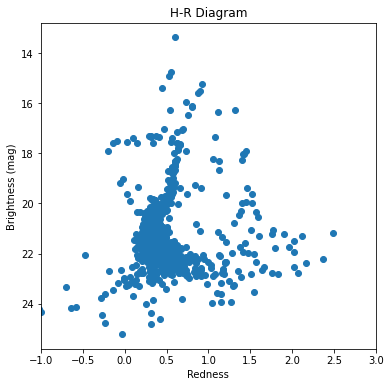

In [ ]:
# Make a scatter plot of brightness vs color

fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(df.g - df.r, df.r)
ax.set_xlim([-1, 3])
ax.invert_yaxis()
ax.set_title('H-R Diagram')
ax.set_xlabel('Redness')
ax.set_ylabel('Brightness (mag)');


The H-R diagram of the Palomar 5 globular cluster contains a lot of information.  Compare the plot we just made with a generalized cartoon H-R diagram:

<img src="https://upload.wikimedia.org/wikipedia/commons/1/17/Hertzsprung-Russel_StarData.png" width=600>

The bulk of stars are in a rough line that goes from the bottom right to the upper left (red, dim to blue, bright).  These are "main sequence" stars that are fusing hydrogen in their cores.  Stars spend most of their lifetimes as main sequence stars.  Their place on the main sequence is determined by their mass.  Smaller stars are redder, cooler and fuse hydrogen slowly.  More massive stars are bluer, hotter and fuse hydrogen very quickly.  In our diagram we can see that the main group of stars swings off the main sequence to the right at a brightness of magnitude 21.  This is known as the "main sequence turnoff".  These stars have run out of hydrogen in their cores and have started to fuse helium.  Fusing helium makes the stars puff up and become "red giants".  The swollen outer layers are far from the core so they become cooler and redder but the stars are still very large and so they are very bright.  The location of the main sequence turnoff tells us about the age of the cluster.  All of the cluster stars were born at about the same time.  The biggest, brightest, bluest ones run out of hydrogen in their cores and turn off the main sequence first.  The lower in brightness the turnoff occurs, the older the cluster since less heavy stars have had time to run out of hydrogen.  The cutoff in our diagram is quite low, indicating that the cluster is fairly old.  This is expected since globular clusters typically contain some of the oldest stars in the galaxy.

In [ ]:
# TASK 3: Create a scatter plot of star locations with 
# right ascension on the x-axis and declination on the
# y-axis.  You will get something round since we are 
# dealing with all stars within 3 arcminutes of the center



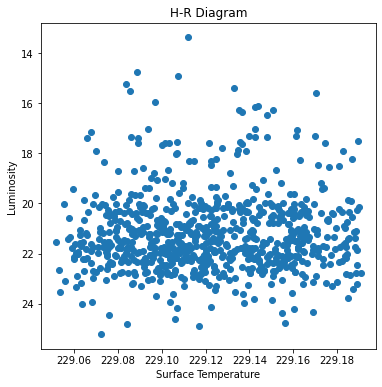

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(df.ra - df.dec, df.r)
ax.set_xlim()
ax.invert_yaxis()
ax.set_title('H-R Diagram')
ax.set_xlabel('Surface Temperature')
ax.set_ylabel('Luminosity');